<a href="https://colab.research.google.com/github/Aayushi-Sharma24/Online_Retail_Customer_Segmentation_Unsupervised/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

##Importing Libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#populate the dataframe
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Projects -Draft/unsupervised /Online Retail.xlsx")

###Let's Explore the data

In [ ]:
#First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#check shape
df.shape

(541909, 8)



*   Rows = 5,41,909
*   Columns = 8



In [ ]:
#check column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
#check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#check statistical aspects of dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
print("Number of transactions: ", df['InvoiceNo'].nunique())
print("Number of products bought: ", df['StockCode'].nunique())
print("Number of customers:", df['CustomerID'].nunique())
print('Number of countries: ', df['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Number of countries:  38


##Let's check for Missing values in the dataset

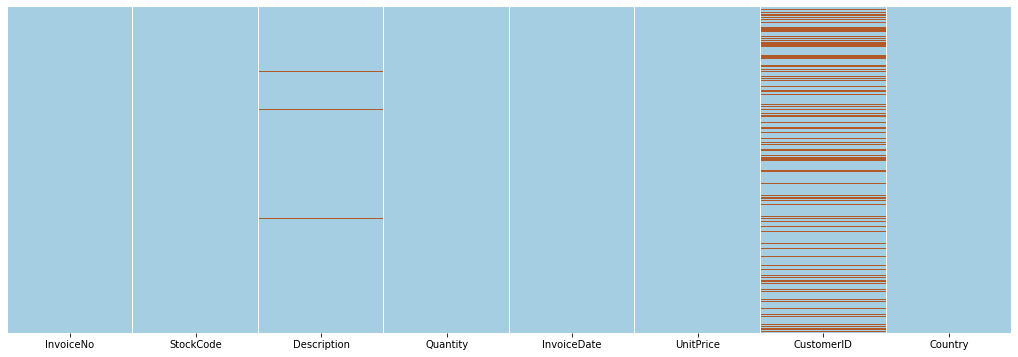

In [ ]:
# Visualising Null values using heatmap
plt.rcParams['figure.figsize'] = (18, 6)
sns.heatmap(df.isnull(), cbar=False,yticklabels=False,cmap='Paired')

In [ ]:
#check null values
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

**CustomerId** and **Description** features have null values

##Let's check for Duplicated data

In [ ]:
# check for duplicate rows
df.duplicated().sum()

5268

There are 5268 duplicated rows in our dataset. We will drop these duplicated rows

In [ ]:
# Dropping Duplicate Rows
df=df.drop_duplicates()

###Let's check the missing values again after dropping duplicated rows

In [ ]:
#check null values
df.isnull().sum().sort_values(ascending=False)

CustomerID     135037
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

##Exploratory Data Analysis

###Top 10 countries based on orders

Text(0.5, 1.0, 'top 10 countries based on orders')

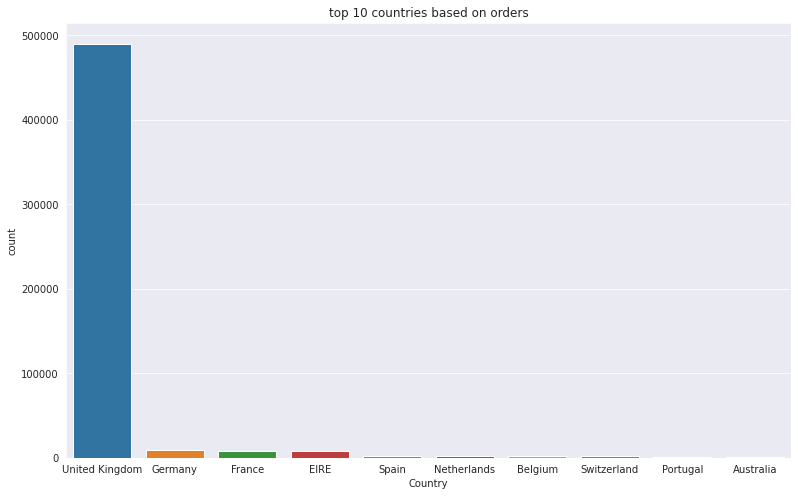

In [ ]:
#Plotting data using countplot
plt.figure(figsize=(13,8))
sns.set_style("darkgrid")
sns.countplot(x='Country', data=df, order=df.Country.value_counts().iloc[:10].index)
plt.title("top 10 countries based on orders")

####Maximum orders are recieved from United Kingdom

###Bottom 5 Countries based on orders

Text(0.5, 1.0, 'Least 5 countries based on orders')

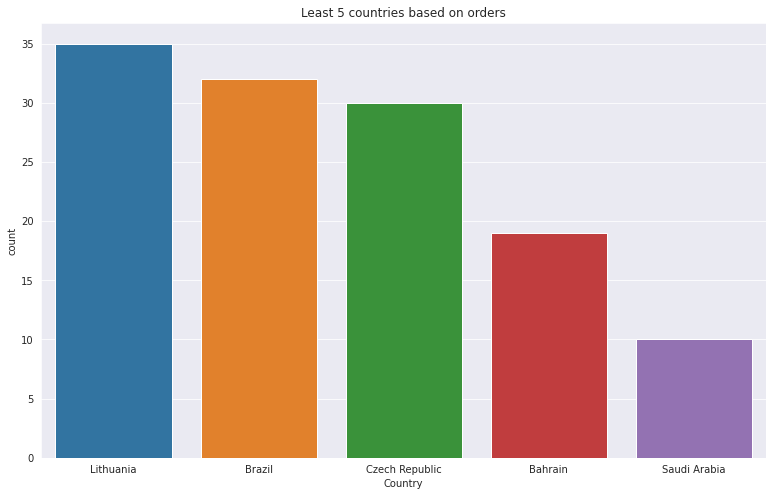

In [ ]:
#Plotting data using countplot
plt.figure(figsize=(13,8))
sns.countplot(x='Country', data=df, order=df.Country.value_counts().iloc[33:].index)
plt.title("Least 5 countries based on orders")

Least number of Orders are from Saudi Arabia

###Let's find out Top 5 Product name

In [ ]:
#Extracting description data in a dataframe
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2357
1,REGENCY CAKESTAND 3 TIER,2189
2,JUMBO BAG RED RETROSPOT,2156
3,PARTY BUNTING,1720
4,LUNCH BAG RED RETROSPOT,1625


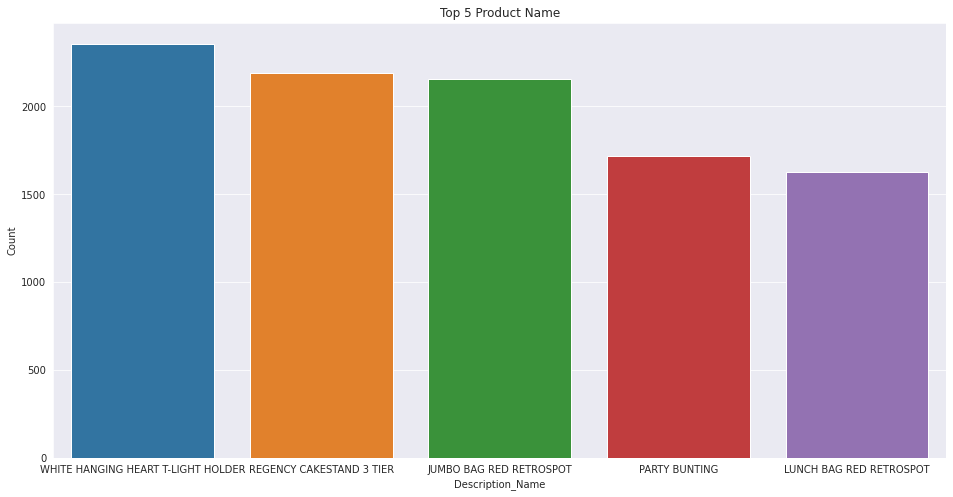

In [ ]:
#Plotting data using barplot
plt.figure(figsize=(16,8))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

Most popular product is WHITE HANGING HEART T-LIGHT HOLDER

###Let's Explore Stock Name

In [ ]:
#Extracting StockCode data in a dataframe
StockCode_df=df['StockCode'].value_counts().reset_index()
StockCode_df.rename(columns={'index': 'StockCode_Name'}, inplace=True)
StockCode_df.rename(columns={'StockCode': 'Count'}, inplace=True)
StockCode_df.head()

,StockCode_Name,Count
0,85123A,2301
1,22423,2192
2,85099B,2156
3,47566,1720
4,20725,1626


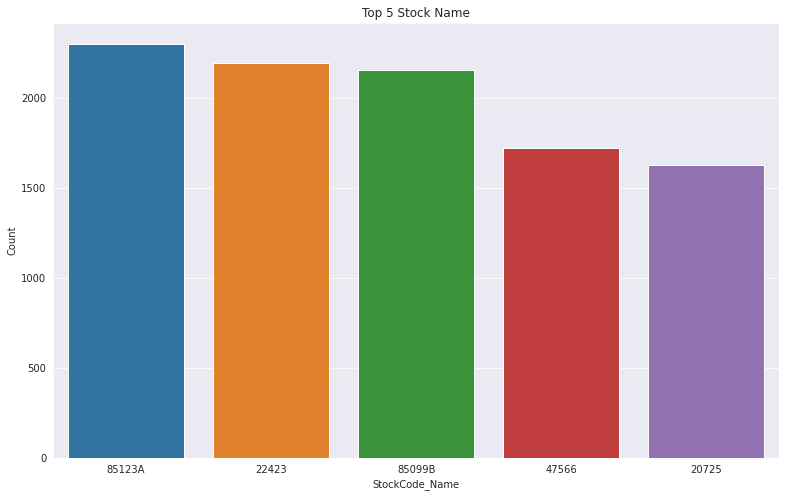

In [ ]:
#Plotting data using barplot
plt.figure(figsize=(13,8))
plt.title('Top 5 Stock Name')
sns.barplot(x='StockCode_Name',y='Count',data=StockCode_df[:5])

###Overview of Quantity column

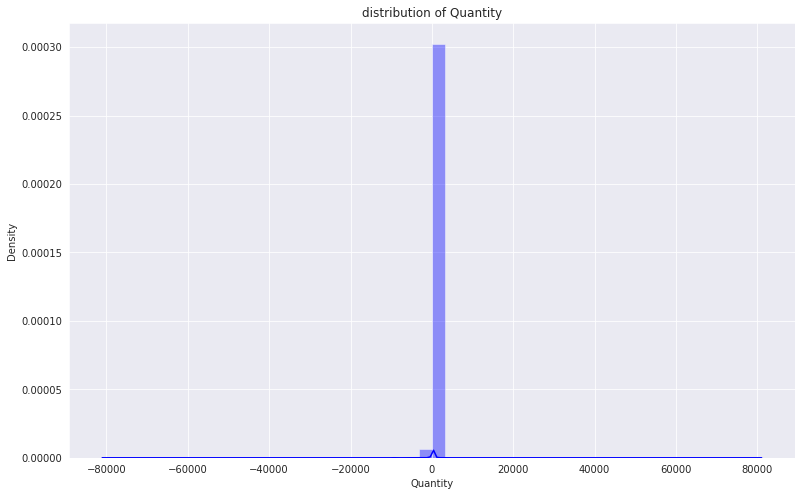

In [ ]:
#distribution of Quantity
plt.figure(figsize=(13,8))
plt.title('distribution of Quantity')
sns.distplot(df['Quantity'],color="B")

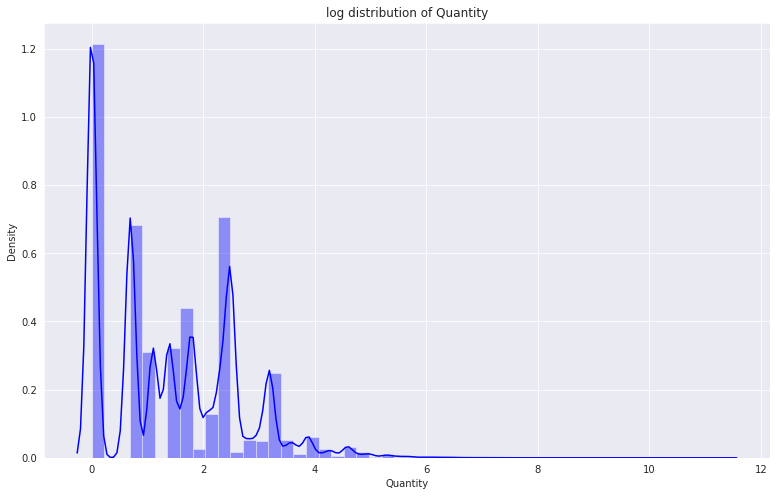

In [ ]:
#log distribution of Quantity
plt.figure(figsize=(13,8))
plt.title('log distribution of Quantity')
sns.distplot(np.log(df['Quantity']),color="B")

###Overview of Unit Price

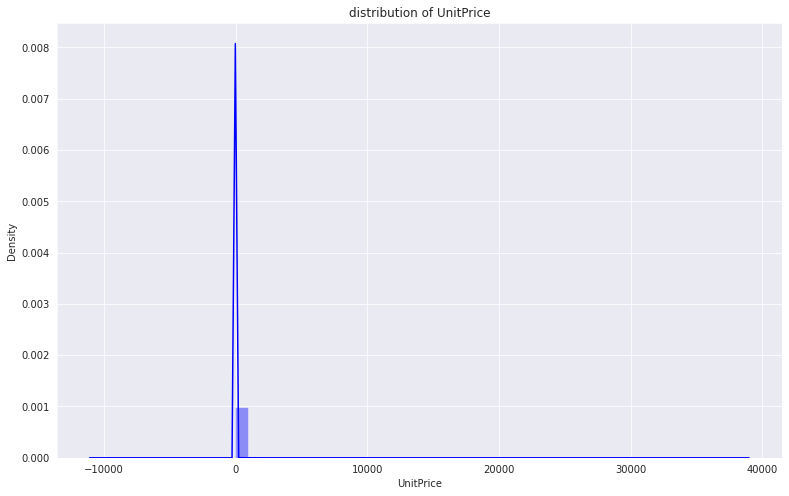

In [ ]:
#distribution of UnitPrice
plt.figure(figsize=(13,8))
plt.title('distribution of UnitPrice')
sns.distplot(df['UnitPrice'],color="B")

### What's the average number of unqiue items per order and per customer?

In [ ]:
#extracting unique items per order 
groupby_invoice = pd.DataFrame(df.groupby('InvoiceNo')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

,Number of Items per Order
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [ ]:
#statistical analysis
groupby_invoice.describe()

,Number of Items per Order
count,25900.000000
mean,20.510618
std,42.500488
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [ ]:
#extracting unique items per customer 
groupby_ID = pd.DataFrame(df.groupby('CustomerID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
CustomerID,
12346.0,1
12347.0,103
12348.0,22
12349.0,73
12350.0,17


In [ ]:
#statistical analysis
groupby_ID.describe()

,Number of Items per Customer
count,4372.000000
mean,61.211116
std,85.425119
min,1.000000
25%,15.000000
50%,35.000000
75%,77.000000
max,1794.000000


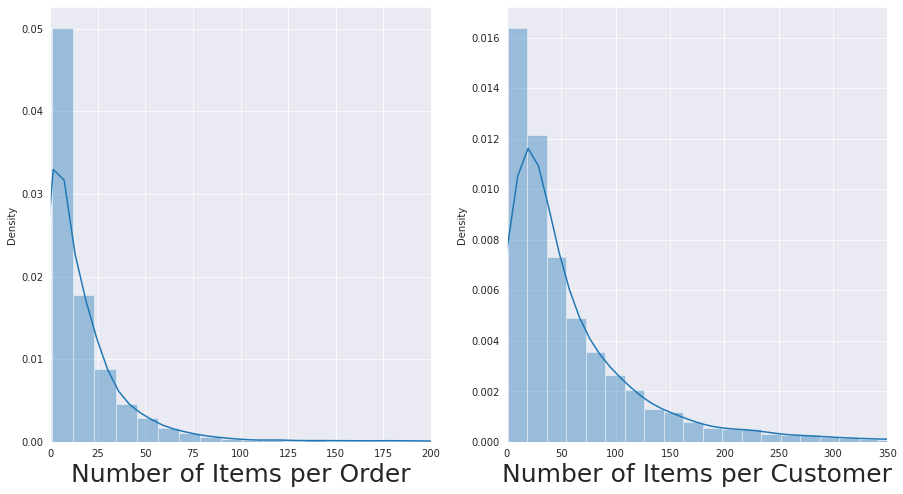

In [ ]:
#Visualize the distribution of both
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(15, 8)
plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

We have skewed left distributions for both plots. The average number of items per order is 20.5 and the average number of items per customer is 60

###Most popular day of the week ?

In [ ]:
#Extracting new feature from Invoice Date 
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%Y-%m-%d %H:%M:%S")
df['Day']=df['InvoiceDate'].dt.day_name()

df["year"] = df["InvoiceDate"].apply(lambda x: x.year)
df["month_num"] = df["InvoiceDate"].apply(lambda x: x.month)
df["day_num"] = df["InvoiceDate"].apply(lambda x: x.day)
df["hour"] = df["InvoiceDate"].apply(lambda x: x.hour)
df["minute"] = df["InvoiceDate"].apply(lambda x: x.minute)
df['Month']=df['InvoiceDate'].dt.month_name()

In [ ]:
#checking sale day wise
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

,Day_Name,Count
0,Thursday,103056
1,Tuesday,101064
2,Monday,94435
3,Wednesday,93715
4,Friday,81565
5,Sunday,62806


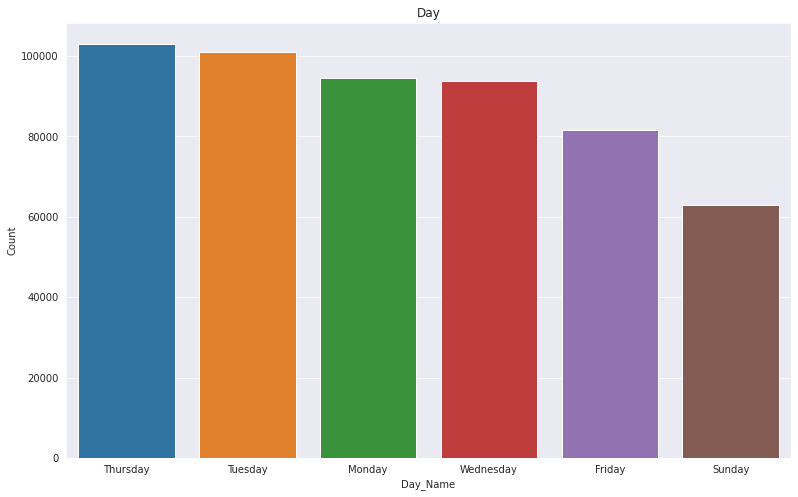

In [ ]:
#Plotting the data of most popular day
plt.figure(figsize=(13,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

Most orders are recieved on Thursday followed by Tuesday and Monday

###Most popular month?

In [ ]:
#checking sale month wise
month_df=df['Month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'Month': 'Count'}, inplace=True)
month_df

,Month_Name,Count
0,November,83343
1,December,67227
2,October,59969
3,September,49861
4,July,39267
5,May,36782
6,June,36609
7,March,36439
8,August,35064
9,January,34900


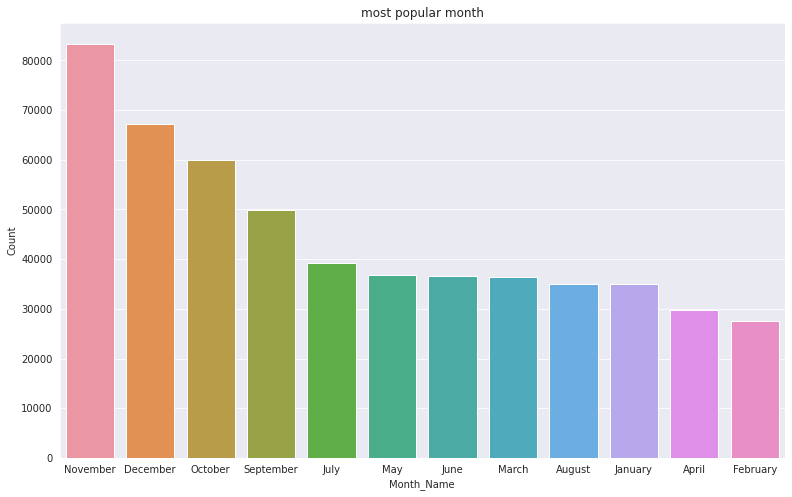

In [ ]:
#plotting data for most popular month
plt.figure(figsize=(13,8))
plt.title('most popular month')
sns.barplot(x='Month_Name',y='Count',data=month_df)

Most orders are recieved in the month of November followed by December

###At what time customer purchases most items?

In [ ]:
#creating new function to classify time of the day
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
df['Time_type']=df['hour'].apply(time_type)

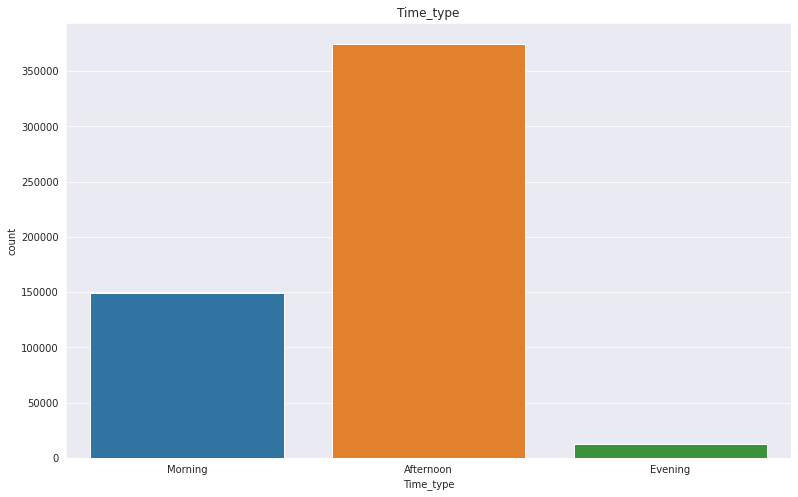

In [ ]:
#plotting data
plt.figure(figsize=(13,8))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df)

####Most customers buy at Afternoon

###How many orders were cancelled?

In [ ]:
cancelled_orders = df[df['InvoiceNo'].astype(str).str.contains('C')]
print("There were", len(cancelled_orders), "cancelled orders.")

#Calculate the percentage of cancellations by dividing the cancelled orders by the total orders
total_orders = df['InvoiceNo'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9251 cancelled orders.
Percentage of orders cancelled: 35.72% 


##Feature Engineering

###Null value Treatment

####Applying Most frequent catergory imputation on Description feature

In [ ]:
#Define function to impute nan values
def impute_nan(df,variable):
  most_frequent_category=df[variable].mode()[0]
  df[variable].fillna(most_frequent_category,inplace=True)

In [ ]:
#apply impute nan function
impute_nan(df,"Description")

####Applying Random sample imputation on CustomerID

In [ ]:
#Define function to impute nan values
def impute_nan_numeric(df,variable):
  df[variable+'_random']=df[variable]
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  random_sample.index= df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
#apply impute nan function
impute_nan_numeric(df,'CustomerID')
df.drop(['CustomerID'],axis=1,inplace=True)

In [ ]:
#check null values again
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
Country              0
Day                  0
year                 0
month_num            0
day_num              0
hour                 0
minute               0
Month                0
Time_type            0
CustomerID_random    0
dtype: int64

*All null values are gone!!*

###Outlier Treatment

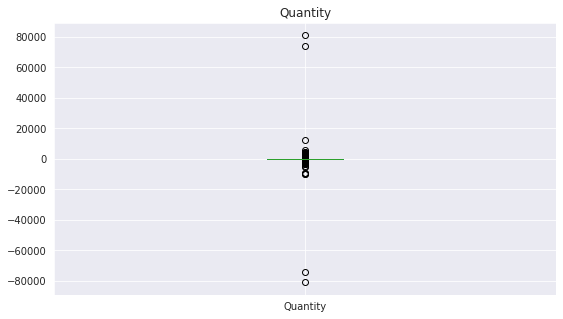

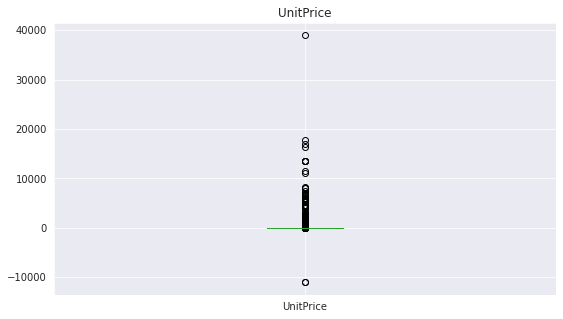

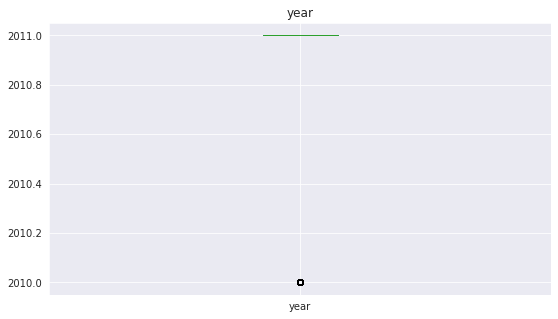

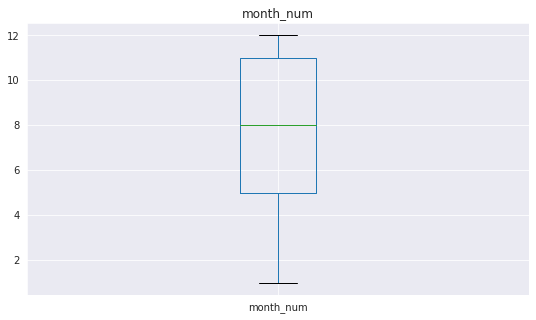

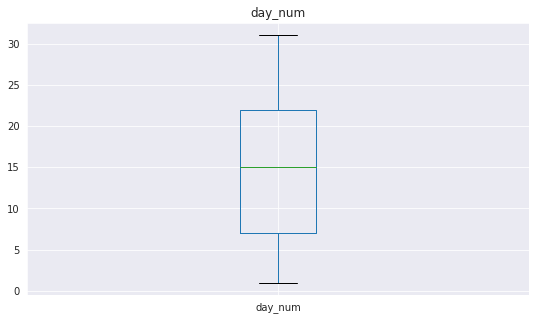

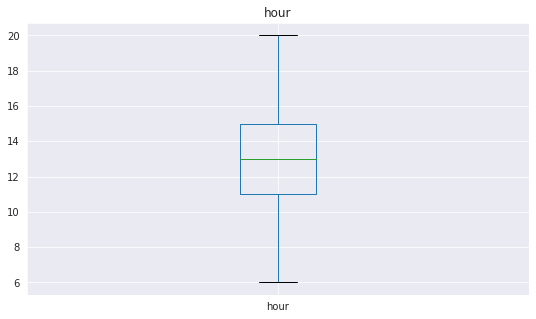

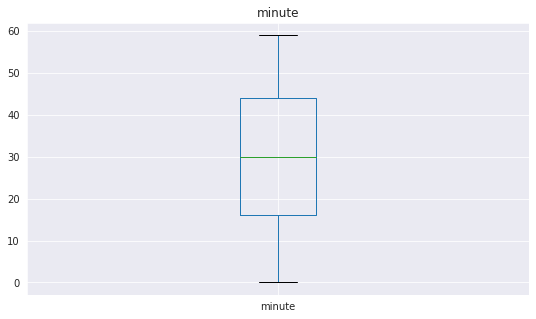

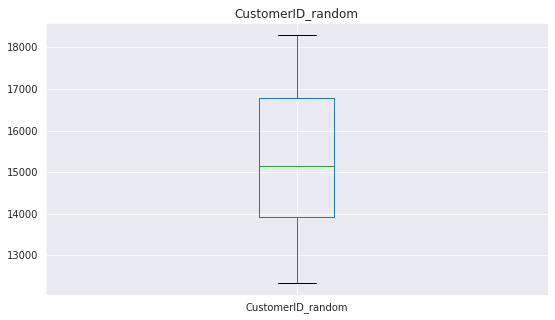

In [ ]:
#Plotting boxplot for all numeric columns to check outliers
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
for col in numerical_features[:]:
    fig = plt.figure(figsize=(9, 5))
    ax = fig.gca()
    df.boxplot(column=col) 
    ax.set_title(col)
plt.show()

**Quantity** and **UnitPrice** have outliers

In [ ]:
#Performing outlier treatment using IQR method
for i in ['Quantity','UnitPrice']:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1

  df[i]=np.where(df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),df[i]))

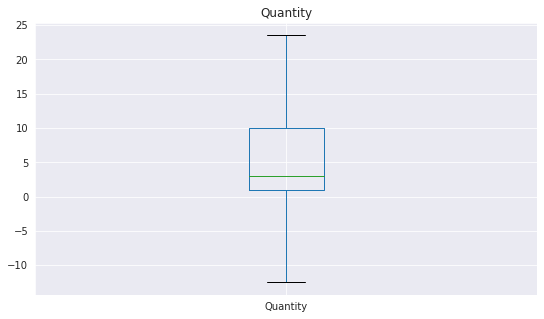

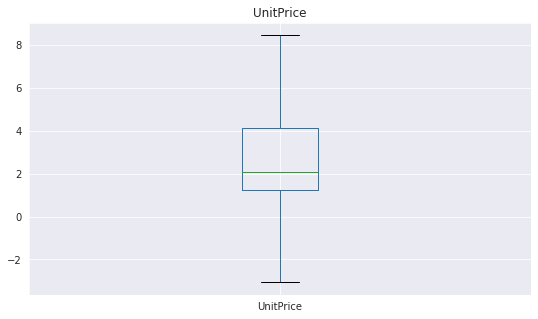

In [ ]:
#Check for outliers again
for i in ['Quantity','UnitPrice']:
    fig = plt.figure(figsize=(9, 5))
    ax = fig.gca()
    df.boxplot(column=i) 
    ax.set_title(i)
plt.show()

##RFM Analysis

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total 
#Amount for each customer
import datetime as dt
df['TotalAmount']=df['Quantity']*df['UnitPrice']
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df = df.groupby('CustomerID_random').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df['InvoiceDate'] = rfm_df['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

,CustomerID_random,Recency,Frequency,Monetary
0,12346.0,325,2,11.440
1,12347.0,0,242,4341.250
2,12348.0,9,41,593.720
3,12349.0,3,100,1632.375
4,12350.0,135,21,329.645


In [ ]:
#Descriptive Statistics (Recency)
rfm_df.Recency.describe()

count    4372.000000
mean       23.470037
std        53.603259
min         0.000000
25%         1.000000
50%         4.000000
75%        18.000000
max       373.000000
Name: Recency, dtype: float64

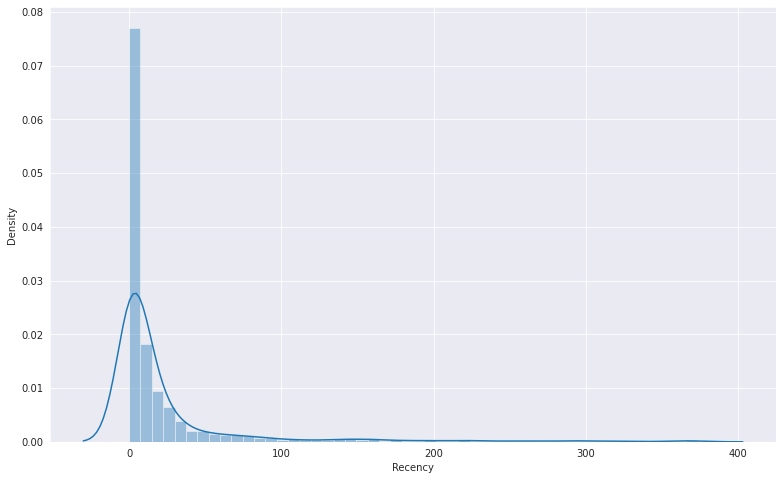

In [ ]:
#Recency distribution plot
x = rfm_df['Recency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df.Frequency.describe()

count     4372.000000
mean       122.744968
std        305.322658
min          1.000000
25%         23.000000
50%         55.000000
75%        134.000000
max      10385.000000
Name: Frequency, dtype: float64

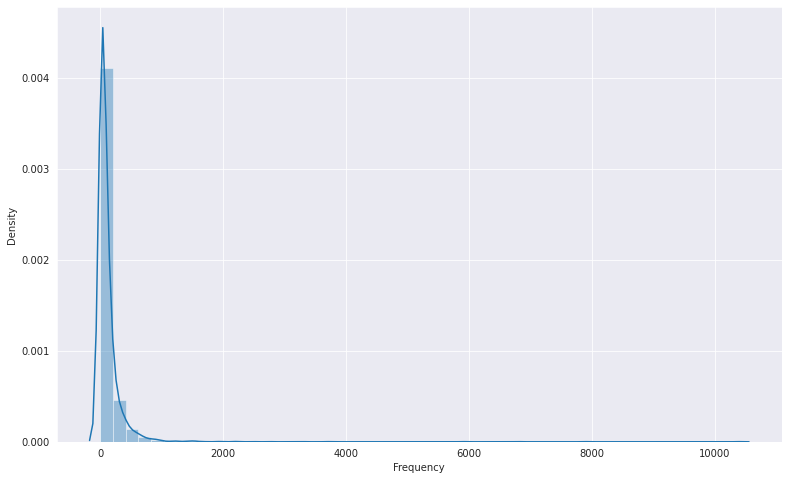

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x = rfm_df['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(x)

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df.Monetary.describe()

count      4372.000000
mean       1591.682432
std        3848.892332
min        -425.185000
25%         308.757500
50%         687.935000
75%        1671.946250
max      127562.505000
Name: Monetary, dtype: float64

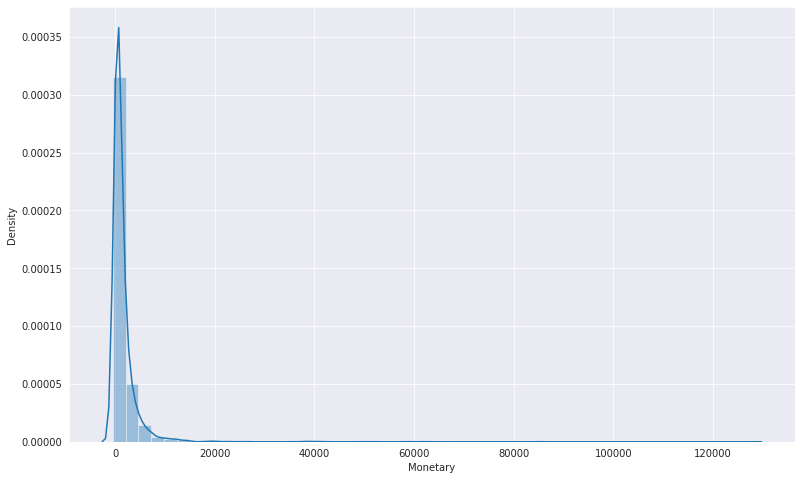

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x = rfm_df['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(x)

###RFM scoring

In [ ]:
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 23.0, 0.5: 55.0, 0.75: 134.0},
 'Monetary': {0.25: 308.75750000000005, 0.5: 687.935, 0.75: 1671.94625},
 'Recency': {0.25: 1.0, 0.5: 4.0, 0.75: 18.0}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID_random,,,,,,
12346.0,325,2,11.440,4,4,4
12347.0,0,242,4341.250,1,1,1
12348.0,9,41,593.720,3,3,3
12349.0,3,100,1632.375,2,2,2
12350.0,135,21,329.645,4,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID_random,,,,,,,,
12346.0,325,2,11.440,4,4,4,444,12
12347.0,0,242,4341.250,1,1,1,111,3
12348.0,9,41,593.720,3,3,3,333,9
12349.0,3,100,1632.375,2,2,2,222,6
12350.0,135,21,329.645,4,4,3,443,11


In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
rfm_df['Recency'] = [handle_neg_n_zero(x) for x in rfm_df.Recency]
rfm_df['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

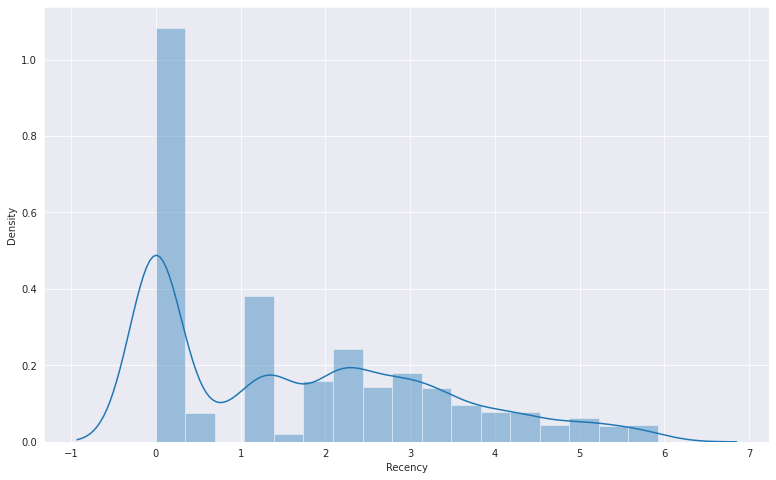

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
plt.figure(figsize=(13,8))
sns.distplot(Recency_Plot)

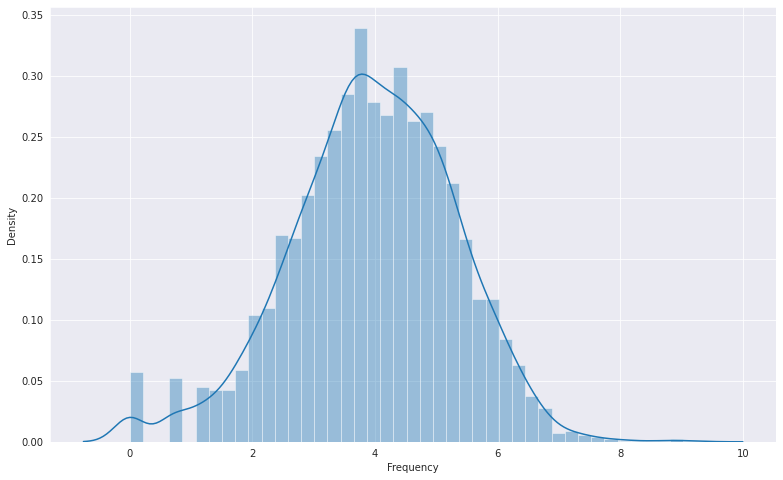

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
plt.figure(figsize=(13,8))
sns.distplot(Frequency_Plot)

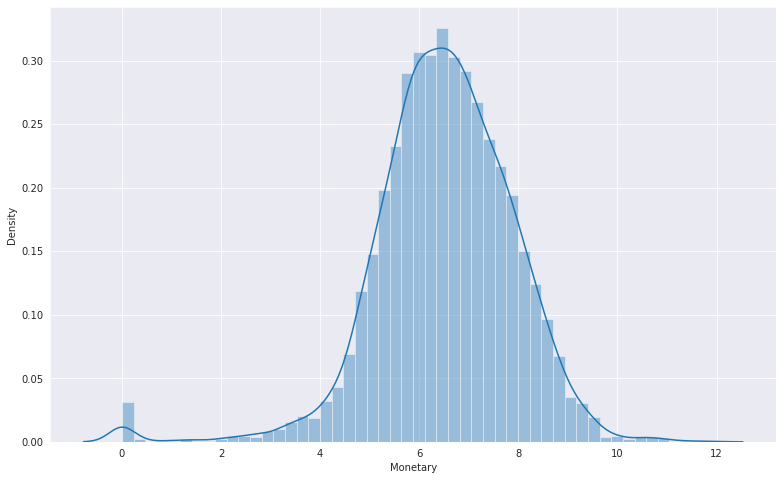

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('Monetary < 10000')['Monetary']
plt.figure(figsize=(13,8))
sns.distplot(Monetary_Plot)

In [ ]:
from sklearn import preprocessing
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

##K Means Clustering

###Applying Silhouette Score Method on Recency and Monetary

In [ ]:
##Applying K means Clustering
#import required libraries
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
#getting recency and monetary feature values
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
#Scaling the features
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon
#creating clusters and apply k means
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.48296531635775286
For n_clusters = 3, silhouette score is 0.4153683910963207
For n_clusters = 4, silhouette score is 0.3981472531466325
For n_clusters = 5, silhouette score is 0.3970796271518048
For n_clusters = 6, silhouette score is 0.4019854530356179
For n_clusters = 7, silhouette score is 0.3965836246789627
For n_clusters = 8, silhouette score is 0.3891366741190375
For n_clusters = 9, silhouette score is 0.3992656598383211
For n_clusters = 10, silhouette score is 0.3929675763707881
For n_clusters = 11, silhouette score is 0.3943882622671375
For n_clusters = 12, silhouette score is 0.3982524252889158
For n_clusters = 13, silhouette score is 0.4051328208545101
For n_clusters = 14, silhouette score is 0.4070436473574387
For n_clusters = 15, silhouette score is 0.40701403597450586


###Applying Elbow Method on Recency and Monetary

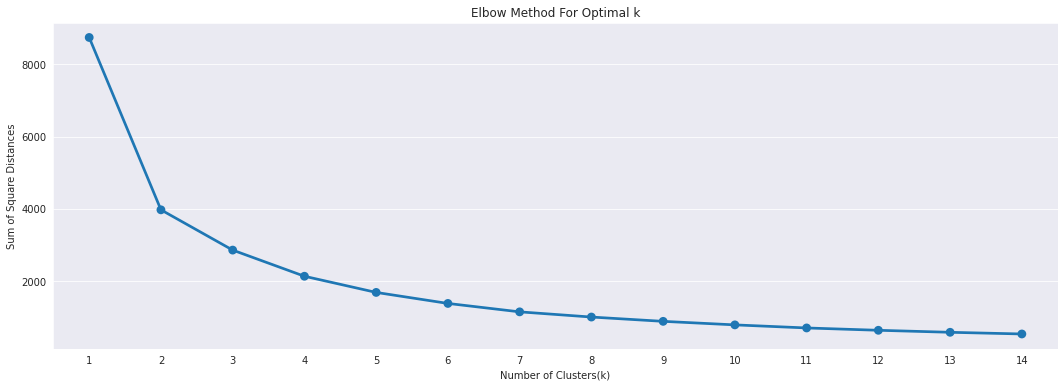

In [ ]:
#getting recency and monetary feature values
features_rec_mon=['Recency_log','Monetary_log']
X_features_rec_mon=rfm_df[features_rec_mon].values
#Scaling the features
scaler_rec_mon=preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

from sklearn.cluster import KMeans
#apply k means
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
#apply k means with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

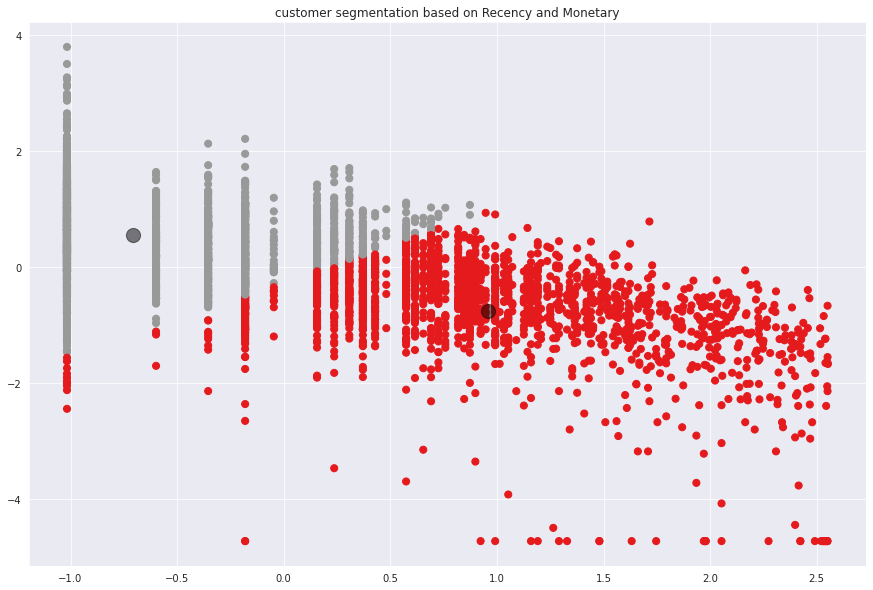

In [ ]:
#plotting customer segmentation with 2 clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='Set1')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

###Applying DBSCAN on Recency and Monetary

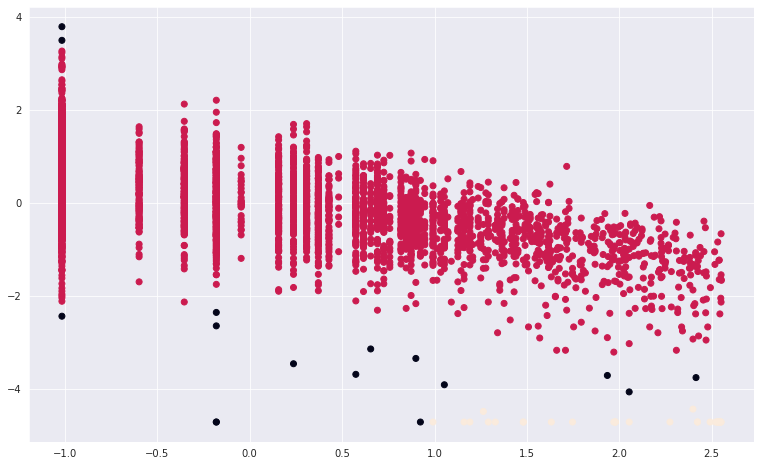

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
#apply DBSCAN and plotting the clusters
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

we see that ,Customers are well separate when we cluster them by Recency and Monetary

###Applying silhouette Score Method on Frquency and Monetary

In [ ]:
#getting Frequency and monetary feature values
features_fre_mon=['Frequency_log','Monetary_log']
X_features_fre_mon=rfm_df[features_fre_mon].values
#Scaling the features
scaler_fre_mon=preprocessing.StandardScaler()
X_fre_mon=scaler_fre_mon.fit_transform(X_features_fre_mon)
X=X_fre_mon
#apply k means and print silhouette score
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4991538750550285
For n_clusters = 3, silhouette score is 0.4626732877085323
For n_clusters = 4, silhouette score is 0.4461649207246919
For n_clusters = 5, silhouette score is 0.4268093759678506
For n_clusters = 6, silhouette score is 0.4056638522442443
For n_clusters = 7, silhouette score is 0.3962066469468498
For n_clusters = 8, silhouette score is 0.37095755974487793
For n_clusters = 9, silhouette score is 0.3500840655514596
For n_clusters = 10, silhouette score is 0.34111535008783955
For n_clusters = 11, silhouette score is 0.3503956867297882
For n_clusters = 12, silhouette score is 0.34541780709104714
For n_clusters = 13, silhouette score is 0.3527290335137212
For n_clusters = 14, silhouette score is 0.34158166335410867
For n_clusters = 15, silhouette score is 0.3579825168150281


###Applying Elbow Method on Frequency and Monetary

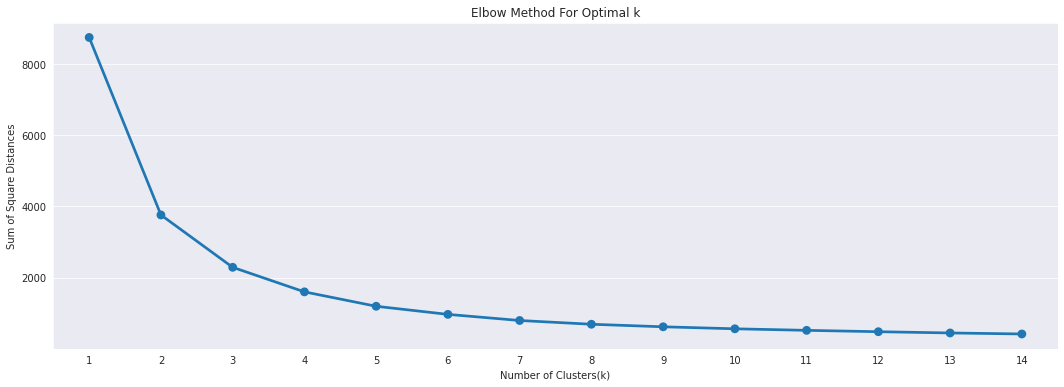

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
#apply k means on frequency and monetary with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

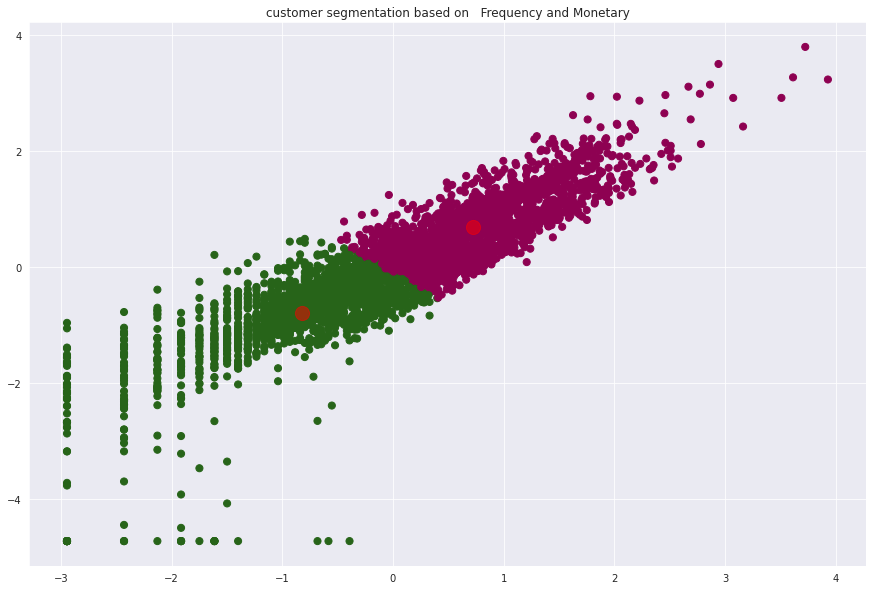

In [ ]:
#plotting the customer segmentation
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on   Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

###Applying DBSCAN to Method on Frquency and Monetary

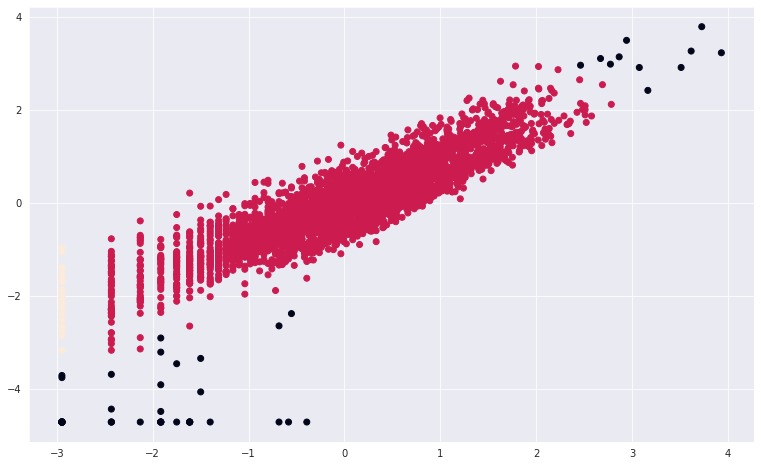

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
#apply DBSCAN on frequency and monetary
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

we see that ,Customers are well separate when we cluster them by Frequency and Monetary

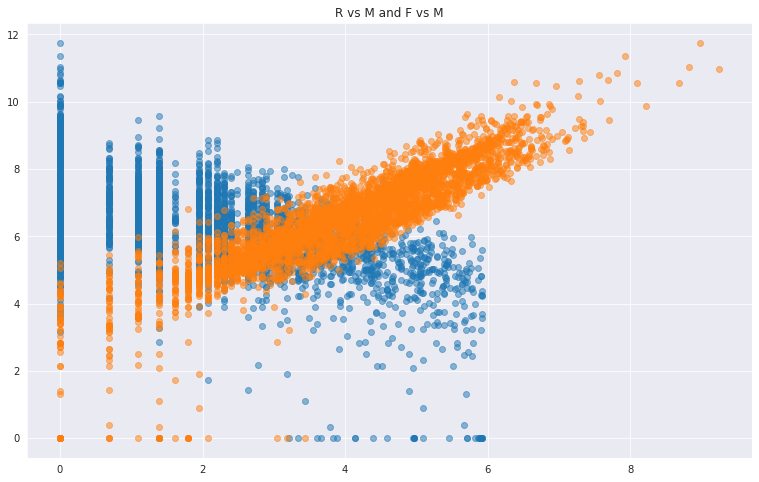

In [ ]:
#plotting customer segmentation of Recency and Monetary vs Frequency and Monetary
plt.figure(figsize=(13,8))
plt.title('R vs M and F vs M')
plt.scatter(rfm_df.Recency_log,rfm_df.Monetary_log,alpha=0.5)
plt.scatter(rfm_df.Frequency_log,rfm_df.Monetary_log,alpha=0.5)

###3D visualization of Recency ,Frequency and Monetary

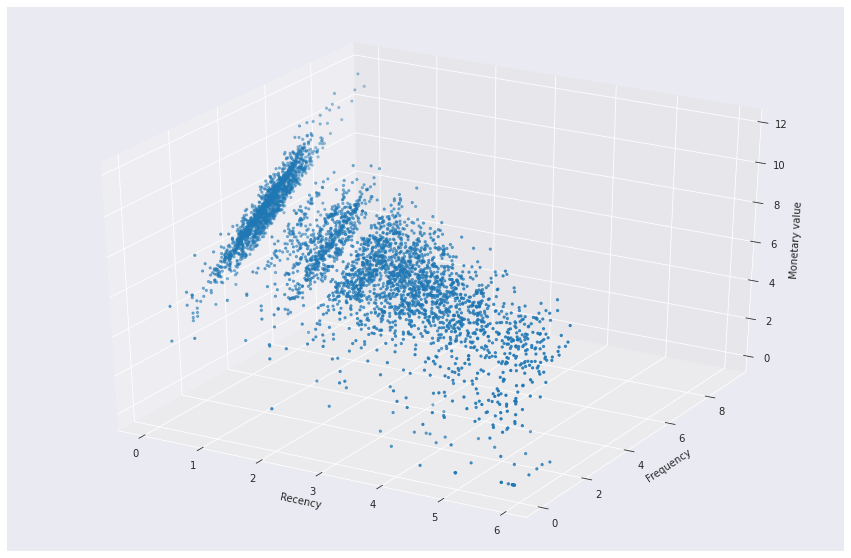

In [ ]:
#Plot 3D graph of RFM
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(15,10))
plt.title('3d visualization of Recency Frequency and Monetary')
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df.Recency_log
ys=rfm_df.Frequency_log
zs=rfm_df.Monetary_log
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')
plt.show()

###Applying Silhouette Method on Recency ,Frequency and Monetary

In [ ]:
#Getting RFM as a list
feature_vector=['Recency_log','Frequency_log','Monetary_log']
X_features=rfm_df[feature_vector].values
#scaling features
scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X_features)

For n_clusters = 2 The average silhouette_score is : 0.45524869803039136
For n_clusters = 3 The average silhouette_score is : 0.3771549556013974
For n_clusters = 4 The average silhouette_score is : 0.34529551761829974
For n_clusters = 5 The average silhouette_score is : 0.3572681690300187
For n_clusters = 6 The average silhouette_score is : 0.3392565061792288
For n_clusters = 7 The average silhouette_score is : 0.33489841403495113
For n_clusters = 8 The average silhouette_score is : 0.33798880425506955
For n_clusters = 9 The average silhouette_score is : 0.336371771555955
For n_clusters = 10 The average silhouette_score is : 0.3167488824282701
For n_clusters = 11 The average silhouette_score is : 0.3239420475492963
For n_clusters = 12 The average silhouette_score is : 0.3128536992943165
For n_clusters = 13 The average silhouette_score is : 0.31461880743498927
For n_clusters = 14 The average silhouette_score is : 0.3228103658376653
For n_clusters = 15 The average silhouette_score is : 0

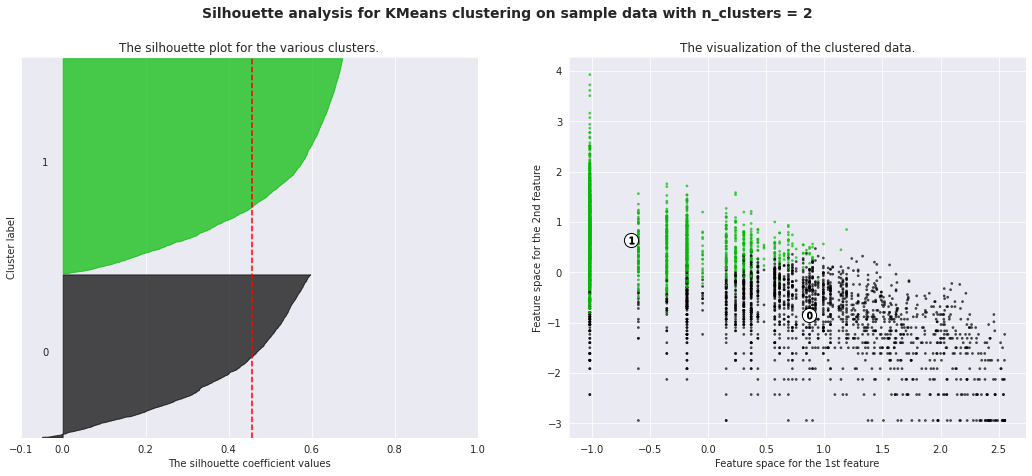

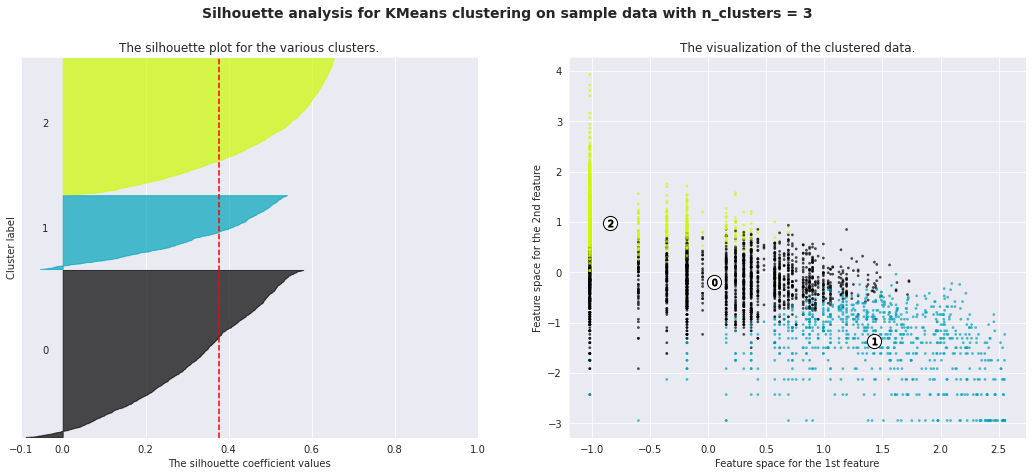

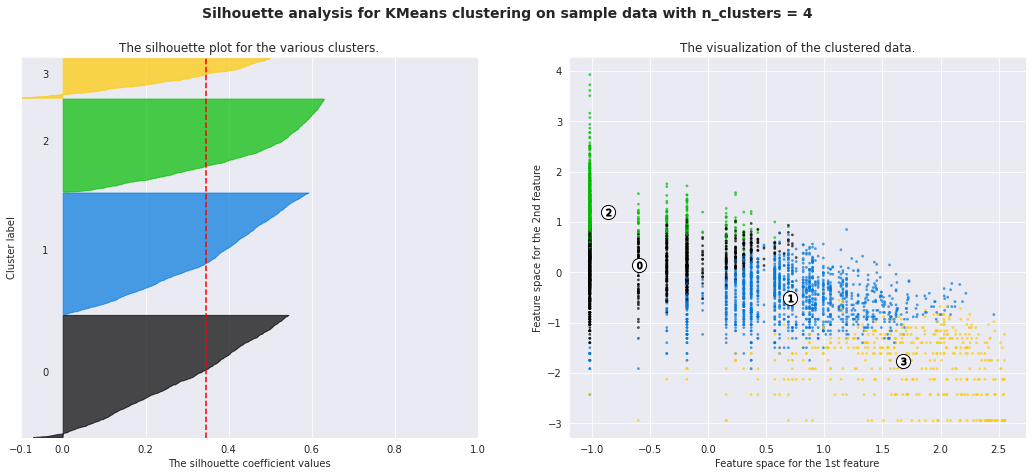

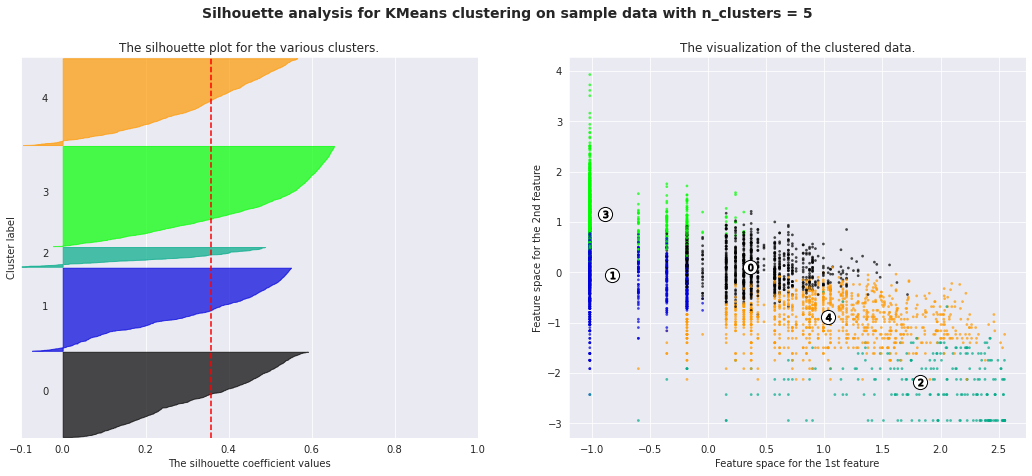

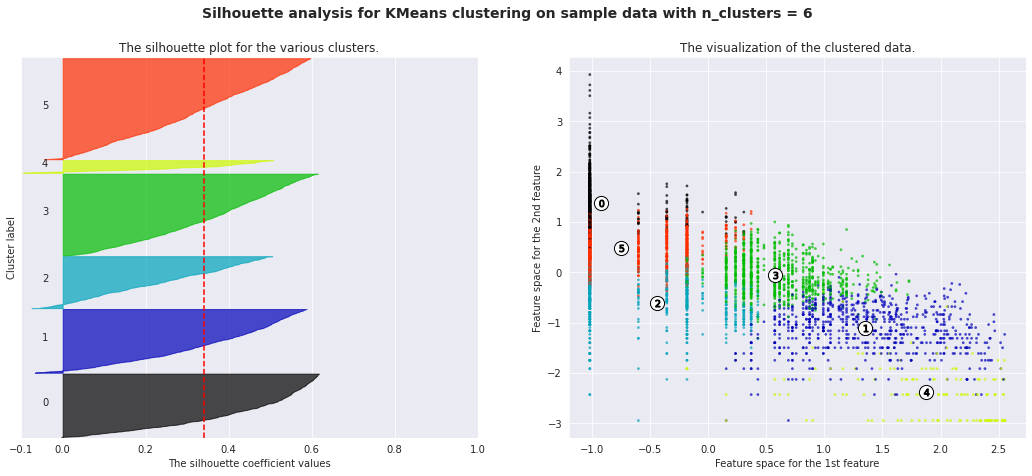

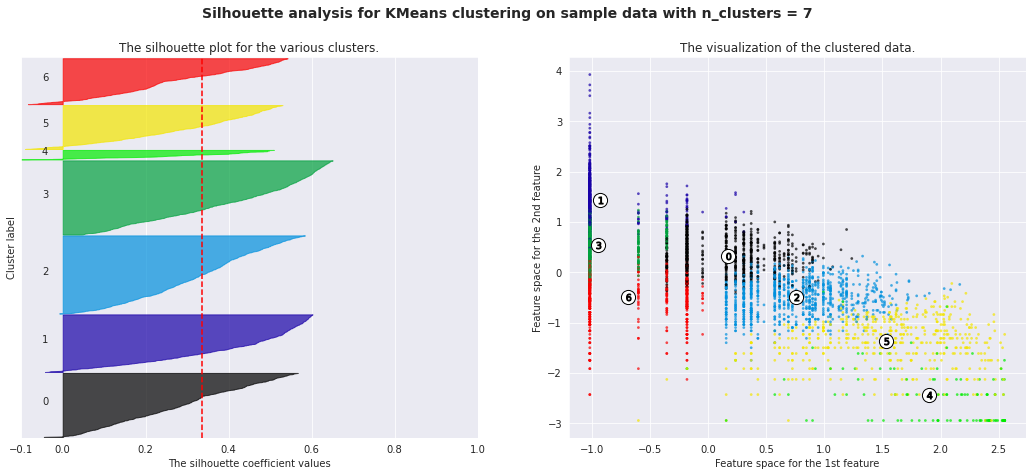

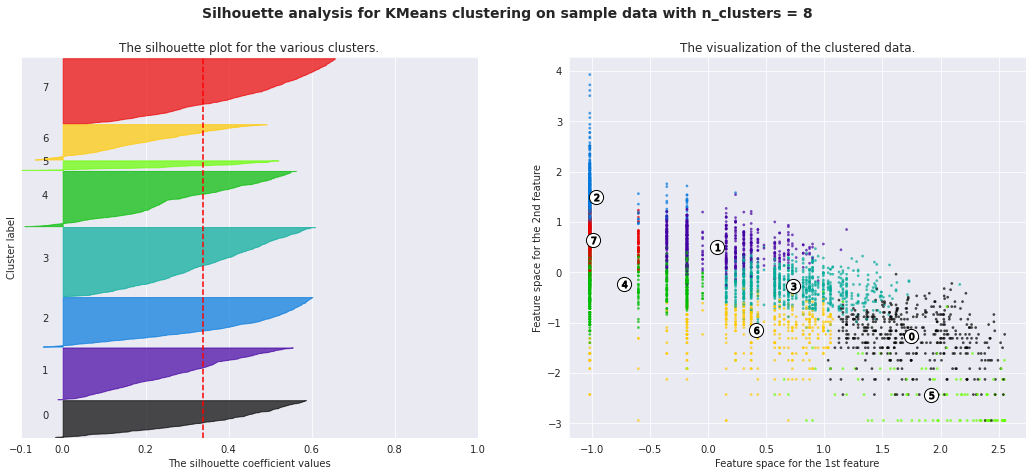

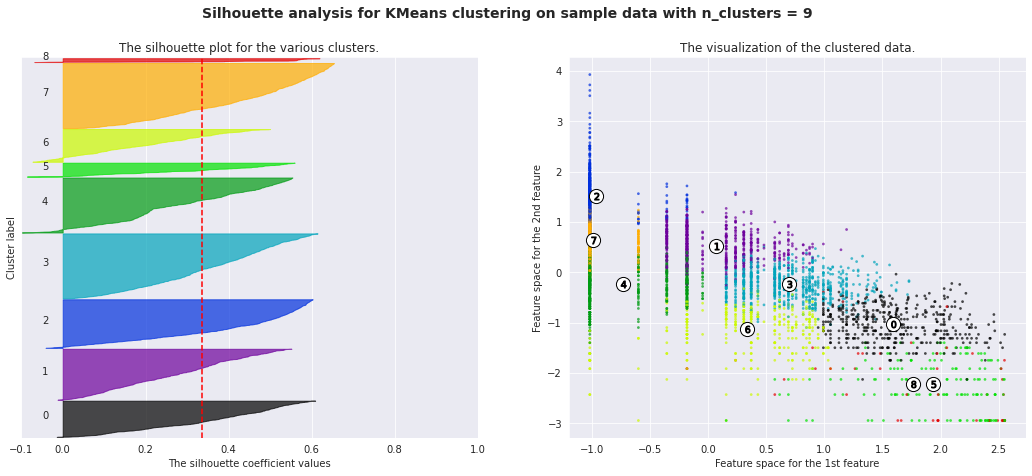

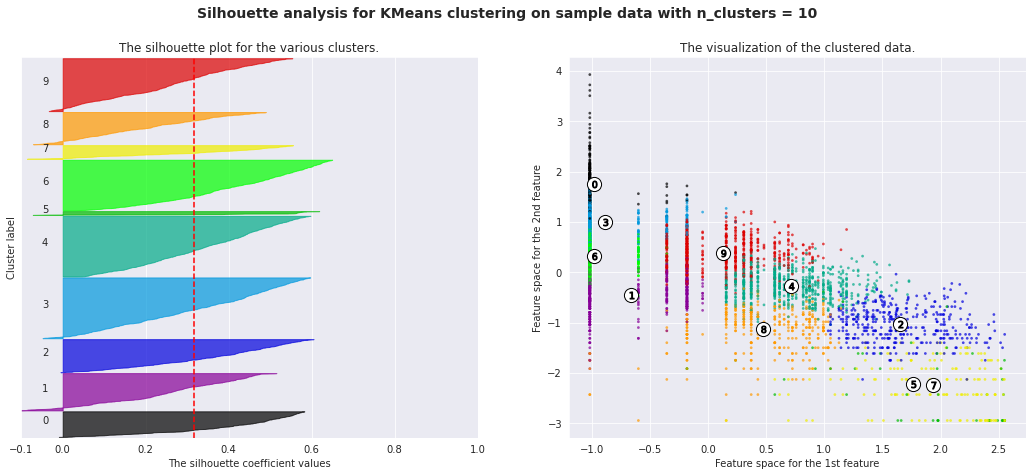

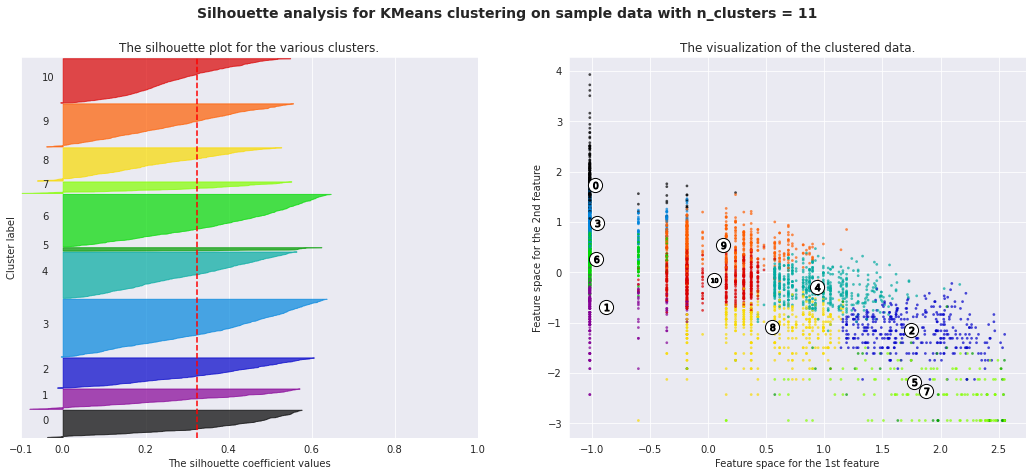

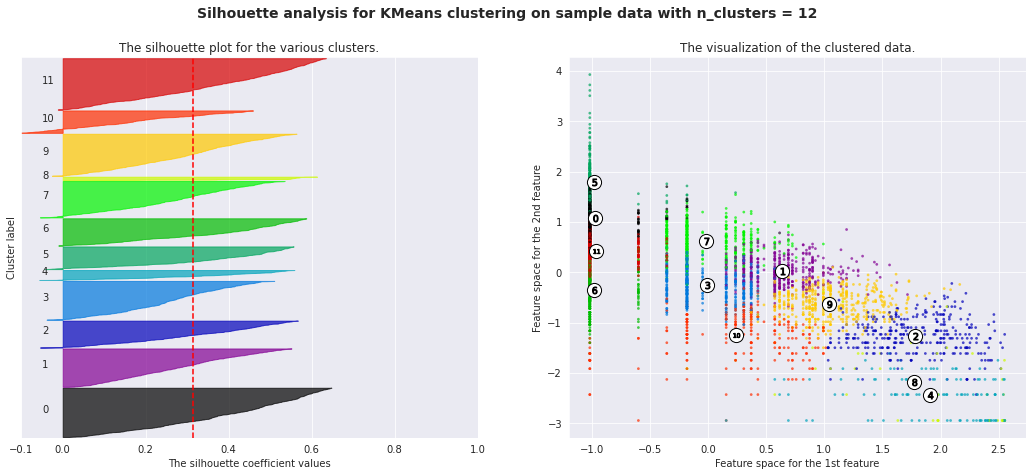

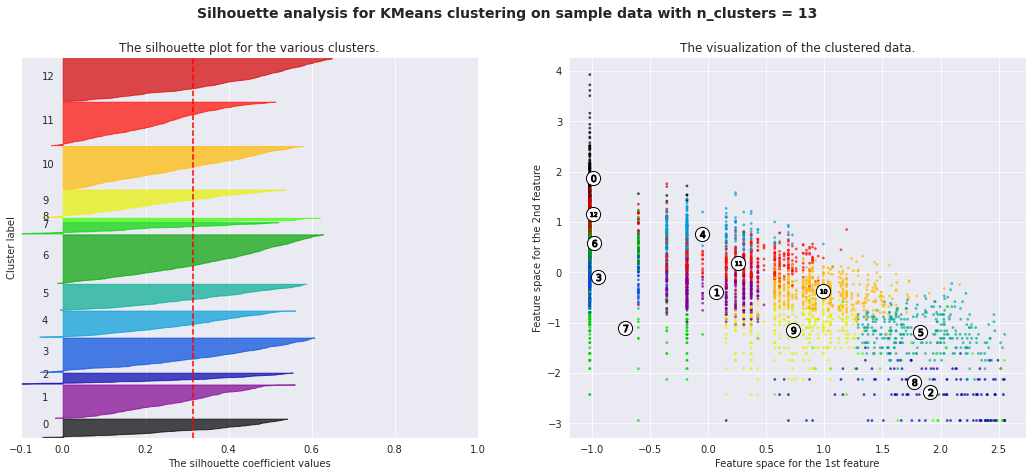

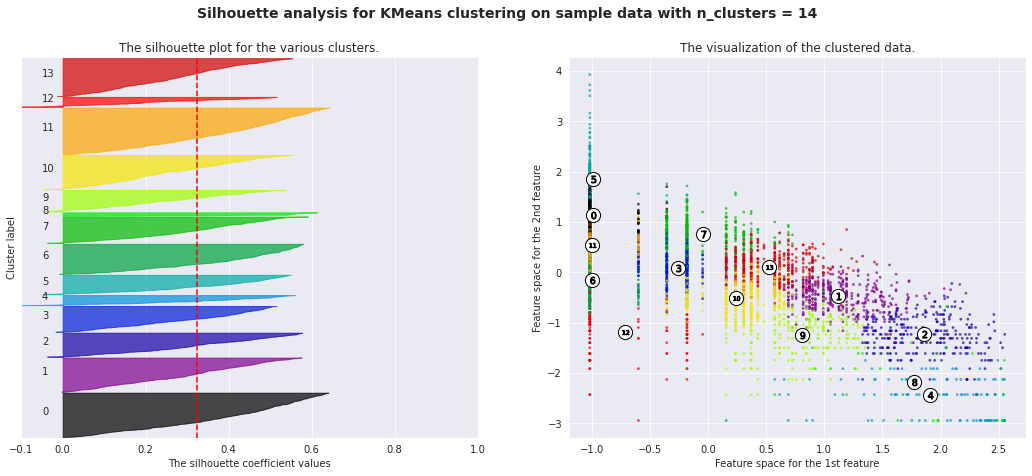

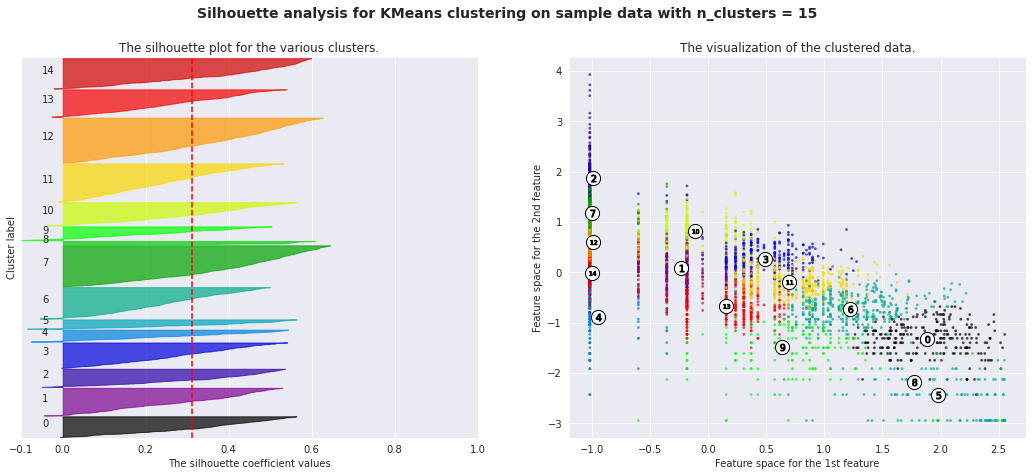

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
cluster_centers = dict()

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from sklearn.cluster import KMeans
#apply k means on RFM with 2 clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

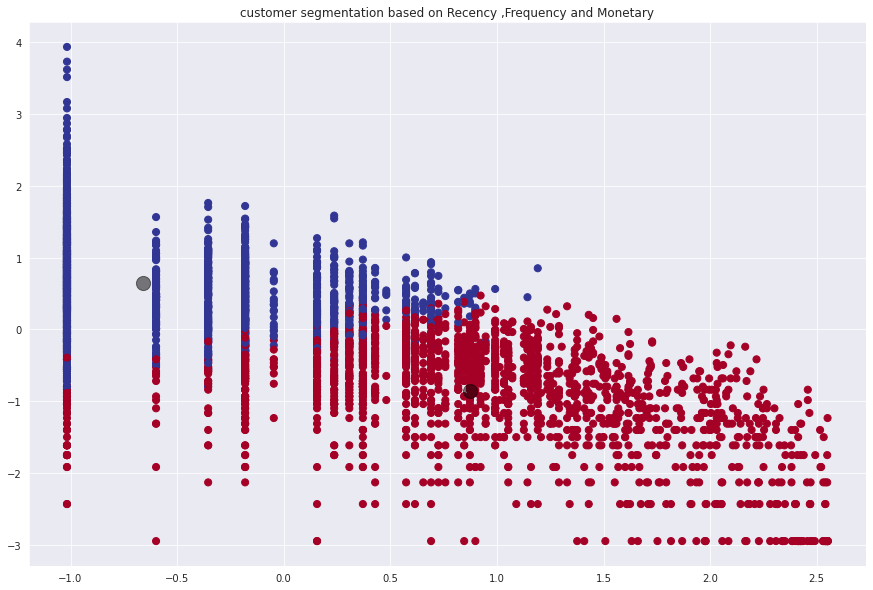

In [ ]:
#plotting customer segmentation based on RFM
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency ,Frequency and Monetary')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')
#plot centers of clusters
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

###Applying Elbow Method on Recency ,Frequency and Monetary

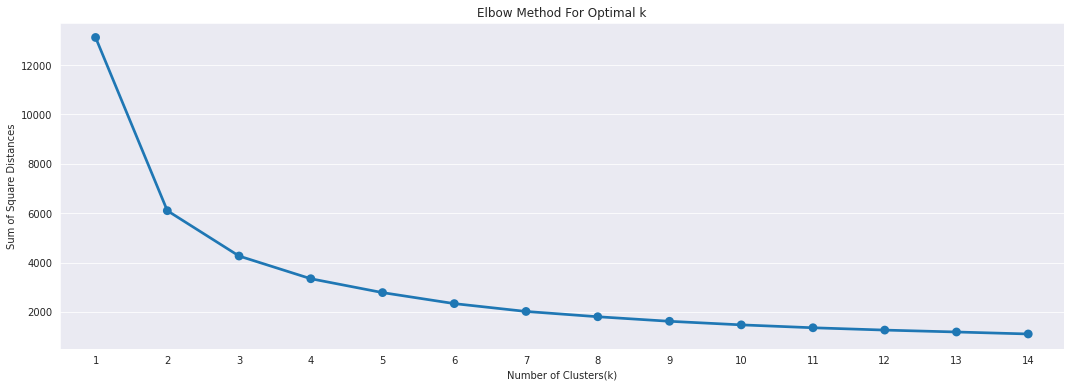

In [ ]:
#apply elbow method on RFM
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Means Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Recency_log,Frequency_log,Monetary_log,Cluster
CustomerID_random,,,,,,,,,,,,
12346.0,325,2,11.440,4,4,4,444,12,5.783825,0.693147,2.437116,1
12347.0,1,242,4341.250,1,1,1,111,3,0.000000,5.488938,8.375918,0
12348.0,9,41,593.720,3,3,3,333,9,2.197225,3.713572,6.386408,1
12349.0,3,100,1632.375,2,2,2,222,6,1.098612,4.605170,7.397791,0
12350.0,135,21,329.645,4,4,3,443,11,4.905275,3.044522,5.798016,1
12352.0,9,127,1520.905,3,2,2,322,7,2.197225,4.844187,7.327061,0
12353.0,98,5,96.580,4,4,4,444,12,4.584967,1.609438,4.570372,1
12354.0,7,74,1173.830,3,2,2,322,7,1.945910,4.304065,7.068027,0
12355.0,1,20,351.605,1,4,3,143,8,0.000000,2.995732,5.862508,0


###Dendogram to find the optimal number of clusters

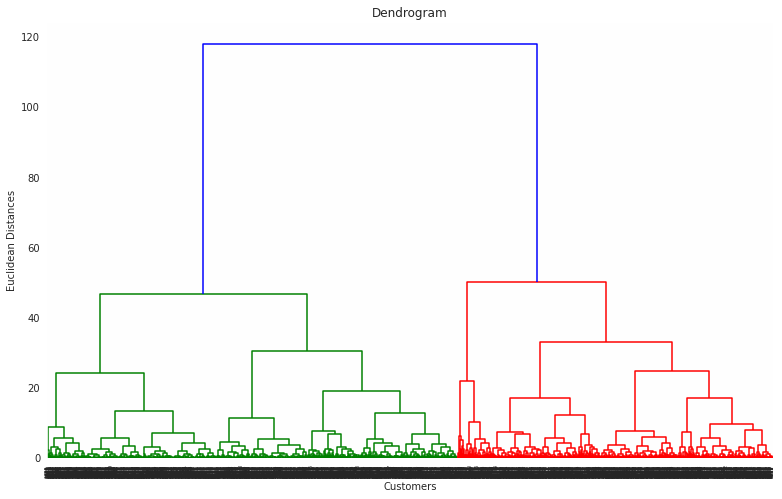

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90

No. of Cluster = 2

In [ ]:
# Fitting hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

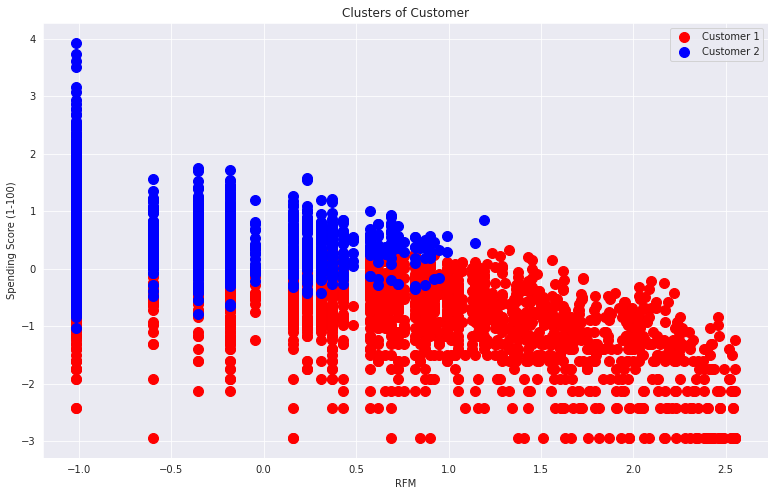

In [ ]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Customer 2')

plt.title('Clusters of Customer')
plt.xlabel('RFM')

plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

By applying different clustering algorithm to our dataset we get the optimal number of cluster is equal to 2

###Applying DBSCAN to Recency ,Frequency and Monetary

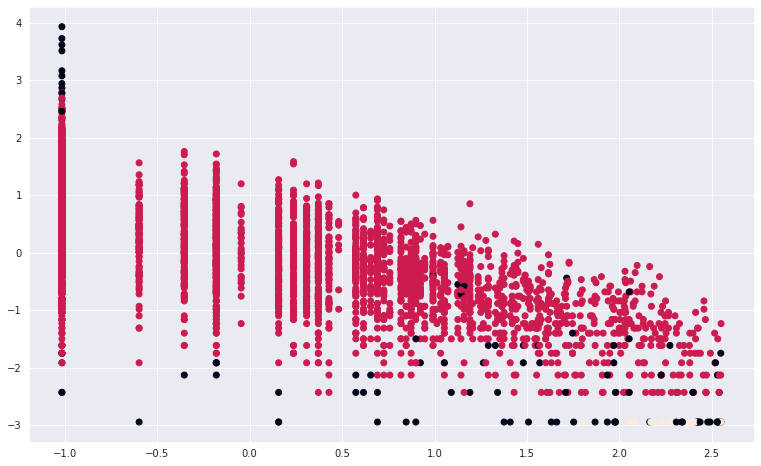

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
#apply DBSCAN on RFM
y_pred = DBSCAN(eps=0.5, min_samples=15).fit_predict(X)
plt.figure(figsize=(13,8))
plt.scatter(X[:,0], X[:,1], c=y_pred)

we see that ,Customers are well separate when we cluster them by Recency ,Frequency and Monetary and optimal number of cluster is equal to 3

###Cluster Analysis & Business Relevance:

In [ ]:
for i in [2,3,4,5,6,7,8,9,10,11,12,13,14,15]:
    print("for {} number of clusters".format(i))
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=["Recency_log", "Frequency_log", "MonetaryValue_log"]))
    print("Silhouette score for cluster {} is {}". format(i, cluster_centers[i]['silhouette_score']))
    print()

for 2 number of clusters
   Recency_log  Frequency_log  MonetaryValue_log
0    22.956785      16.608866         225.933690
1     1.812531     125.386037        1554.914498
Silhouette score for cluster 2 is 0.45524869803039136

for 3 number of clusters
   Recency_log  Frequency_log  MonetaryValue_log
0     5.876547      40.450266         520.482275
1    57.949299       8.412583         118.181179
2     1.337810     196.569629        2430.587581
Silhouette score for cluster 3 is 0.3771549556013974

for 4 number of clusters
   Recency_log  Frequency_log  MonetaryValue_log
0     2.030966      64.068845         772.659731
1    17.501547      26.785614         374.687427
2     1.295895     266.219460        3370.854189
3    87.622808       4.875100          63.287790
Silhouette score for cluster 4 is 0.34529551761829974

for 5 number of clusters
   Recency_log  Frequency_log  MonetaryValue_log
0     9.871637      61.168324         819.633176
1     1.369083      48.705257         561.474132
2

##Observations and Inferences:
1. **Two Clusters (Customer Segments):**

* **High value customer:** 

  'Cluster 1' is the high value customer segment for the online retails store as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently.

* **Low value customer:**

  It is quite evident that 'Cluster 0' has customers who rarely shop and when they order, their orders are pretty low valued. 


2. **Three Clusters (Customer Segments):**
Carefully examining the three cluster classification, we observe following groups of customers:

* **High value customer:** 

  'Cluster 2' is the high value customer segment for the online retails store as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently.

* **Medium value customer:**

  'Cluster 0' appears to be the medium valued customer segment. These customers place an order of a considerable amount, though not as much as high valued customers, but still quite higher than low valued customers. Also, their orders are relatively more frequent than the lowest value segment.

* **Low value customer:**

  It is quite evident that 'Cluster 1' has customers who rarely shop and when they order, their orders are pretty low valued. Apart from the numbers, the visualization of clusters in Silhoutte Analysis show that all three customer segments are quite distinct with very less overlapp between them. The general trend resonated in these 3 clusters is that high monetary value is correlated with high frequency of orders and more recent ones.

3. **Five Clusters (Customer Segments):**
In five clusters, we find the following customer segments:

* **Overall high valued customers:**

  They are typical high value customer who has shopped recently and shops regularly for high value orders.

* **High monetary value but less frequent:**

  They represents a peculiar customer segment who place quite a high valued order but do not do so frequently or have not done much recently. But, these customers do hold a lot of promise if targeted to improve sales.

* **Medium value - low frequency - recent customers:** 

  These customers have recently placed medium valued orders but do not do so frequently.

* **Medium value - low frequency - older customers:**

  These customers happen to place medium valued orders quite a long time ago and they do not do so frequently.

* **Low valued customers:**

  This is the segment of customers who have not shopped in the longest time, nor do they shop frequently and their orders are of the lowest values.
The visualization of clusters in Silhoutte Analysis show some overlapp between the customer segments.


###Summary

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "RM", "2"]) 
myTable.add_row(['2',"K-Means with Elbow method  ", "RM", "2"])
myTable.add_row(['3',"DBSCAN ", "RM", "2"]) 
myTable.add_row(['4',"K-Means with silhouette_score ", "FM", "2"]) 
myTable.add_row(['5',"K-Means with Elbow method  ", "FM", "2"])
myTable.add_row(['6',"DBSCAN ", "FM", "2"])

myTable.add_row(['7',"K-Means with silhouette_score ", "RFM", "2"]) 
myTable.add_row(['8',"K-Means with Elbow method  ", "RFM", "2"])
myTable.add_row(['9',"Hierarchical clustering  ", "RFM", "2"])
myTable.add_row(['10',"DBSCAN ", "RFM", "3"])
print(myTable)

+--------+--------------------------------+------+---------------------------+
| SL No. |           Model_Name           | Data | Optimal_Number_of_cluster |
+--------+--------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score  |  RM  |             2             |
|   2    |  K-Means with Elbow method     |  RM  |             2             |
|   3    |            DBSCAN              |  RM  |             2             |
|   4    | K-Means with silhouette_score  |  FM  |             2             |
|   5    |  K-Means with Elbow method     |  FM  |             2             |
|   6    |            DBSCAN              |  FM  |             2             |
|   7    | K-Means with silhouette_score  | RFM  |             2             |
|   8    |  K-Means with Elbow method     | RFM  |             2             |
|   9    |   Hierarchical clustering      | RFM  |             2             |
|   10   |            DBSCAN              | RFM  |  

##Conclusion

The customer segments thus deduced can be very useful in targeted marketing, scouting for new customers and ultimately revenue growth. After knowing the types of customers, it depends upon the retailer policy whether to chase the high value customers and offer them better service and discounts or try and encourage low/ medium value customers to shop more freqently or of higher monetary values.